In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
file_path = "Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='latin1', parse_dates=['Order Date', 'Ship Date'])
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df = pd.read_csv(file_path, encoding='cp1252')


In [6]:
print(df.shape)
print(df.columns)
df.info()
df.describe()


(9994, 21)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Now safely create new columns
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
df['Profit Margin'] = np.where(df['Sales']==0, 0, df['Profit']/df['Sales'])


In [10]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_margin = total_profit / total_sales
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Profit Margin:", round(avg_margin, 3))


Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Average Profit Margin: 0.125


In [11]:
category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print(category_sales)


                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


In [12]:
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum()
print(region_sales)


               Sales       Profit
Region                           
Central  501239.8908   39706.3625
East     678781.2400   91522.7800
South    391721.9050   46749.4303
West     725457.8245  108418.4489


In [13]:
monthly_sales = df.groupby('Order Month')[['Sales', 'Profit']].sum()
print(monthly_sales)


                   Sales      Profit
Order Month                         
2014-01-01    14236.8950   2450.1907
2014-02-01     4519.8920    862.3084
2014-03-01    55691.0090    498.7299
2014-04-01    28295.3450   3488.8352
2014-05-01    23648.2870   2738.7096
2014-06-01    34595.1276   4976.5244
2014-07-01    33946.3930   -841.4826
2014-08-01    27909.4685   5318.1050
2014-09-01    81777.3508   8328.0994
2014-10-01    31453.3930   3448.2573
2014-11-01    78628.7167   9292.1269
2014-12-01    69545.6205   8983.5699
2015-01-01    18174.0756  -3281.0070
2015-02-01    11951.4110   2813.8508
2015-03-01    38726.2520   9732.0978
2015-04-01    34195.2085   4187.4962
2015-05-01    30131.6865   4667.8690
2015-06-01    24797.2920   3335.5572
2015-07-01    28765.3250   3288.6483
2015-08-01    36898.3322   5355.8084
2015-09-01    64595.9180   8209.1627
2015-10-01    31404.9235   2817.3660
2015-11-01    75972.5635  12474.7884
2015-12-01    74919.5212   8016.9659
2016-01-01    18542.4910   2824.8233
2

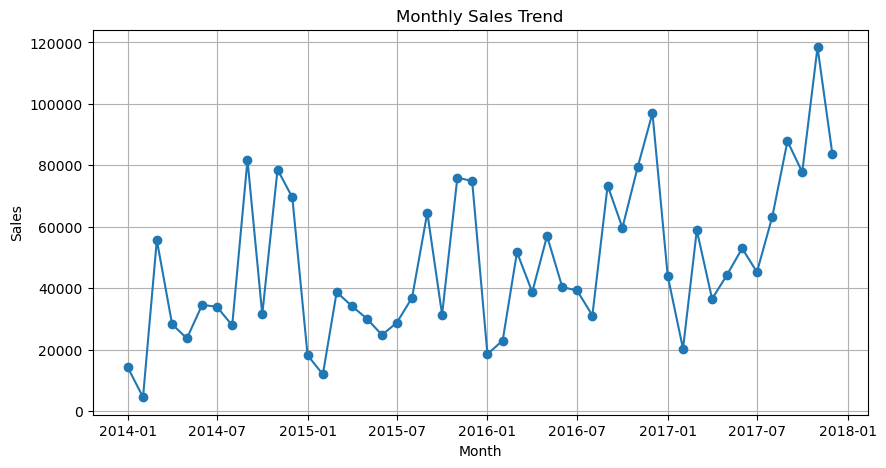

In [14]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


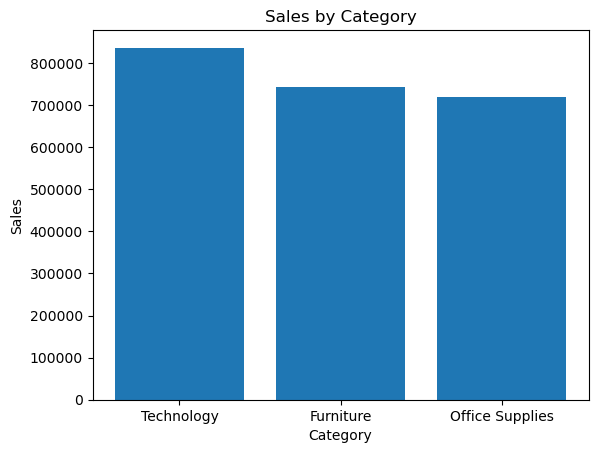

In [15]:
plt.bar(category_sales.index, category_sales['Sales'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


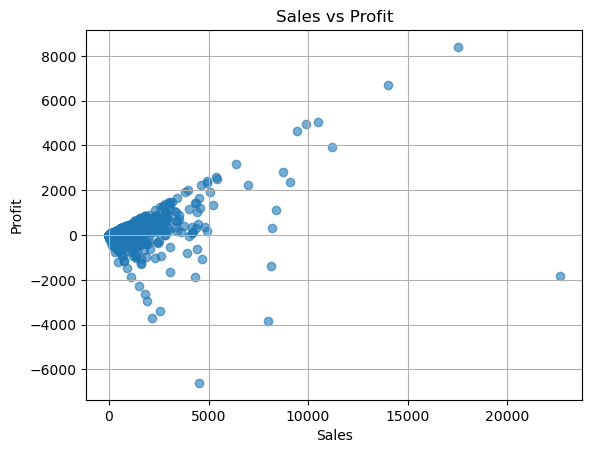

In [16]:
plt.scatter(df['Sales'], df['Profit'], alpha=0.6)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


In [19]:
top_products = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False).head(10)
print(top_products)

top_customers = df.groupby('Customer Name')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False).head(10)
print(top_customers)


                                                        Sales        Profit
Product Name                                                               
Canon imageCLASS 2200 Advanced Copier               61599.824  2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384  7.753039e+03
Cisco TelePresence System EX90 Videoconferencin...  22638.480 -1.811078e+03
HON 5400 Series Task Chairs for Big and Tall        21870.576  5.684342e-14
GBC DocuBind TL300 Electric Binding System          19823.479  2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System    19024.500  7.609800e+02
Hewlett Packard LaserJet 3310 Copier                18839.686  6.983884e+03
HP Designjet T520 Inkjet Large Format Printer -...  18374.895  4.094977e+03
GBC DocuBind P400 Electric Binding System           17965.068 -1.878166e+03
High Speed Automatic Electric Letter Opener         17030.312 -2.620048e+02
                        Sales     Profit
Customer Name                           
Sean M

In [18]:
with pd.ExcelWriter('superstore_summary.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw Data', index=False)
    category_sales.to_excel(writer, sheet_name='Sales by Category')
    monthly_sales.to_excel(writer, sheet_name='Sales by Month')
